In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
import sklearn
from sklearn import datasets
from sklearn import svm
from cycler import cycler
from sklearn.neural_network import MLPClassifier
#import seaborn as sns
# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols



In [2]:
def zscore(column, data):
    #Calculate and return the z-score value of a variable from a DataFrame
    zscoredVariable = (data[column] - data[column].mean())/data[column].std(ddof=0)
    return zscoredVariable

In [31]:
data = pd.read_excel('..\data\DataAnalysisWith90Participants_Jupyter.xlsx')
data = data.iloc[0:86,:]
#variables
normedData = pd.DataFrame()
normedData['cortexVol']= zscore('CortexVol',data)

normedData['rcaud'] = zscore('Right_Caudate',data)
normedData['lcaud'] = zscore('Left_Caudate',data)
normedData['age'] = zscore('Age',data)
normedData['batch'] = data['Batch']

normedData['lamyg'] = zscore('Left_Amygdala',data)
normedData['ramyg'] = zscore('Right_Amygdala',data)
normedData['csf'] = zscore('Cerebrospinal_Fluid',data)
#normedData['sbsod'] = zscore('SBSOD',data)
#normedData['wrat'] = zscore('WRAT',data)
#normedData['mrt'] = zscore('MRT',data)
normedData['ashs_rhc'] = zscore('ASHS_right_total_hippo', data)
normedData['ashs_lhc'] = zscore('ASHS_left_total_hippo',data)
normedData['ashs_post_rhc'] = zscore('ASHS_right_Posterior_hippocampus', data)
normedData['ashs_post_lhc'] = zscore('ASHS_left_Posterior_hippocampus',data)
normedData['ashs_ant_rhc'] = zscore('ASHS_right_Anterior_hippocampus', data)
normedData['ashs_ant_lhc'] = zscore('ASHS_left_Anterior_hippocampus',data)
normedData['ashs_total_hipp'] = zscore('ASHS_total_hippo',data)
normedData['ashs_rerc'] = zscore('ASHS_right_ERC', data)
normedData['ashs_lerc'] = zscore('ASHS_left_ERC',data)
normedData['ashs_lphc'] = zscore('ASHS_left_PHC', data)
normedData['ashs_rphc'] = zscore('ASHS_right_PHC',data)
normedData['ashs_lbr35'] = zscore('ASHS_left_Br35', data)
normedData['ashs_rbr35'] = zscore('ASHS_right_Br35',data)
normedData['ashs_lbr36'] = zscore('ASHS_left_Br36', data)
normedData['ashs_rbr36'] = zscore('ASHS_right_Br36',data)

target = data['int1non2imp3']



iters = 1000
correct = 0
chance = 0
intForNon = 0
intForImp = 0
nonForImp = 0
nonForInt = 0
impForNon = 0
impForInt = 0
impGuessCorr = 0
intGuessCorr = 0
nonGuessCorr = 0
impGuessIncorr = 0
intGuessIncorr = 0
nonGuessIncorr = 0
impGuessTotal = 0
intGuessTotal = 0
nonGuessTotal = 0
for i in range(iters):
    seed = np.random.randint(0,100000)
    np.random.seed(seed)
    indices = np.random.permutation(len(normedData))
    normedData_train = normedData.iloc[indices[:-10]]
    target_train = target.iloc[indices[:-10]]
    normedData_test  = normedData.iloc[indices[-10:]]
    target_test  = target.iloc[indices[-10:]]
    svc = svm.SVC(class_weight='balanced')
    svc.fit(normedData_train, target_train)    
    guess = svc.predict(normedData_test)
    chanceGuess = np.random.choice(target,10)
    for i in target_test:       
        if i == chanceGuess[i]:
            chance += 1
            
        if i == 1 and guess[i] == 1:
            correct += 1
            intGuessCorr += 1
            intGuessTotal += 1
        elif i == 2 and guess[i] == 2:
            correct += 1
            nonGuessCorr += 1
            nonGuessTotal += 1
        elif i == 3 and guess[i] == 3:
            correct+= 1
            impGuessCorr += 1
            impGuessTotal += 1
        elif i == 1 and guess[i] == 2:
            intForNon += 1
            intGuessIncorr += 1
            intGuessTotal += 1
        elif i == 1 and guess[i] == 3:
            intForImp += 1
            intGuessIncorr += 1
            intGuessTotal += 1
        elif i == 2 and guess[i] == 1:
            nonForInt += 1
            nonGuessIncorr += 1
            nonGuessTotal += 1
        elif i == 2 and guess[i] == 3:
            nonForImp += 1
            nonGuessIncorr += 1
            nonGuessTotal += 1
        elif i == 3 and guess[i] == 2:
            impForNon += 1
            impGuessIncorr += 1
            impGuessTotal += 1
        elif i == 3 and guess[i] == 1:
            impForInt += 1
            impGuessIncorr += 1
            impGuessTotal += 1
print(correct/(len(guess)*iters))
print(chance/(len(guess)*iters))

print('intForNon = ', intForNon,
'intForImp = ', intForImp,
'nonForImp = ', nonForImp,
'nonForInt = ', nonForInt,
'impForNon = ', impForNon,
'impForInt = ', impForInt)

print('impGuessCorr = ',impGuessCorr,'intGuessCorr = ', intGuessCorr, 'nonGuessCorr = ', nonGuessCorr)
print('impGuessIncorr = ',impGuessIncorr,'intGuessIncorr = ', intGuessIncorr, 'nonGuessIncorr = ', nonGuessIncorr)
print('impGuessTotal = ',impGuessTotal,'intGuessTotal = ', intGuessTotal, 'nonGuessTotal = ', nonGuessTotal)

0.4822
0.5171
intForNon =  1238 intForImp =  944 nonForImp =  406 nonForInt =  1239 impForNon =  411 impForInt =  940
impGuessCorr =  118 intGuessCorr =  647 nonGuessCorr =  4057
impGuessIncorr =  1351 intGuessIncorr =  2182 nonGuessIncorr =  1645
impGuessTotal =  1469 intGuessTotal =  2829 nonGuessTotal =  5702


In [37]:
from sklearn.decomposition import PCA

iters = 1000
correct = 0
chance = 0
intForNon = 0
intForImp = 0
nonForImp = 0
nonForInt = 0
impForNon = 0
impForInt = 0
impGuessCorr = 0
intGuessCorr = 0
nonGuessCorr = 0
impGuessIncorr = 0
intGuessIncorr = 0
nonGuessIncorr = 0
impGuessTotal = 0
intGuessTotal = 0
nonGuessTotal = 0

pca = PCA(n_components = 2)
pca.fit(normedData, target)
reduced_matrix = pca.fit_transform(normedData, target)

for i in range(iters):
    seed = np.random.randint(0,100000)
    np.random.seed(seed)
    indices = np.random.permutation(len(normedData))
    normedData_train = normedData.iloc[indices[:-10]]
    target_train = target.iloc[indices[:-10]]
    normedData_test  = normedData.iloc[indices[-10:]]
    target_test  = target.iloc[indices[-10:]]
    svc = MLPClassifier(solver='lbfgs',alpha=1e-5,
                         hidden_layer_sizes=(50,50), random_state=1,verbose=10,max_iter=10)
    svc.fit(normedData_train, target_train)    
    guess = svc.predict(normedData_test)
    chanceGuess = np.random.choice(target,10)
    for i in target_test:       
        if i == chanceGuess[i]:
            chance += 1
            
        if i == 1 and guess[i] == 1:
            correct += 1
            intGuessCorr += 1
            intGuessTotal += 1
        elif i == 2 and guess[i] == 2:
            correct += 1
            nonGuessCorr += 1
        elif i == 3 and guess[i] == 3:
            correct+= 1
            impGuessCorr += 1
            impGuessTotal += 1
        elif i == 1 and guess[i] == 2:
            intForNon += 1
            intGuessIncorr += 1
            intGuessTotal += 1
        elif i == 1 and guess[i] == 3:
            intForImp += 1
            intGuessIncorr += 1
            intGuessTotal += 1
        elif i == 2 and guess[i] == 1:
            nonForInt += 1
            nonGuessIncorr += 1
            nonGuessTotal += 1
        elif i == 2 and guess[i] == 3:
            nonForImp += 1
            nonGuessIncorr += 1
            nonGuessTotal += 1
        elif i == 3 and guess[i] == 2:
            impForNon += 1
            impGuessIncorr += 1
            impGuessTotal += 1
        elif i == 3 and guess[i] == 1:
            impForInt += 1
            impGuessIncorr += 1
            impGuessTotal += 1
print(correct/(len(guess)*iters))
print(chance/(len(guess)*iters))

print('intForNon = ', intForNon,
'intForImp = ', intForImp,
'nonForImp = ', nonForImp,
'nonForInt = ', nonForInt,
'impForNon = ', impForNon,
'impForInt = ', impForInt)

print('impGuessCorr = ',impGuessCorr,'intGuessCorr = ', intGuessCorr, 'nonGuessCorr = ', nonGuessCorr)
print('impGuessIncorr = ',impGuessIncorr,'intGuessIncorr = ', intGuessIncorr, 'nonGuessIncorr = ', nonGuessIncorr)
print('impGuessTotal = ',impGuessTotal,'intGuessTotal = ', intGuessTotal, 'nonGuessTotal = ', nonGuessTotal)


0.4496
0.4834
intForNon =  1825 intForImp =  381 nonForImp =  454 nonForInt =  1315 impForNon =  988 impForInt =  541
impGuessCorr =  408 intGuessCorr =  472 nonGuessCorr =  3616
impGuessIncorr =  1529 intGuessIncorr =  2206 nonGuessIncorr =  1769
impGuessTotal =  1937 intGuessTotal =  2678 nonGuessTotal =  1769


In [41]:
reduced_matrix

array([[-2.59020315e+00, -1.83825911e-01],
       [-7.02811051e-01,  4.18436540e+00],
       [-3.79810311e+00, -2.29185868e-01],
       [-3.06584540e-02,  7.45587990e-01],
       [ 1.58658432e+00, -2.45575724e+00],
       [-5.91762574e-01,  2.85857083e+00],
       [-1.86680363e+00, -2.69070896e-05],
       [ 7.78235745e+00, -1.70418334e+00],
       [ 1.31074797e+00, -2.38909212e+00],
       [ 8.36117808e-01, -2.27798716e+00],
       [-1.36776357e+00,  1.78126120e-01],
       [-3.05613513e+00,  1.74098757e+00],
       [-4.10378351e+00,  1.10080125e+00],
       [ 3.85826245e+00,  1.98608918e+00],
       [ 6.46387986e+00,  1.23218048e+00],
       [-6.22812680e-02, -1.16076280e+00],
       [ 2.19218557e-01, -5.11303682e-01],
       [ 2.95010251e+00,  3.54650363e-02],
       [ 1.23873715e+01,  3.84050441e+00],
       [ 5.32018956e+00, -1.29975493e+00],
       [ 1.92251665e+00,  9.81757161e-01],
       [ 1.21489487e+00,  2.51185357e+00],
       [ 3.88153890e+00, -4.51537298e-01],
       [-2.

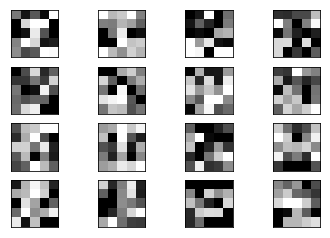

In [18]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = svc.coefs_[0].min(), svc.coefs_[0].max()
for coef, ax in zip(svc.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(5,5), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

ValueError: Filler values must be provided when X has more than 2 training features.

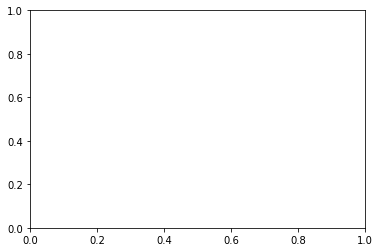

In [38]:
#import sys
#!{sys.executable} -m pip install mlxtend

from mlxtend.plotting import plot_decision_regions

normedData_train = normedData_train.values
plot_decision_regions(X=normedData_train, 
                      y=target_train.values,
                      clf=svc)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel('PC1', size=14)
plt.ylabel('PC2', size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()